# EE393 Term Project
#### Data classification and pattern recognition using data set IRIS
Ercument Burak Tokman - S013090

## 1 - Import Libraries
First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

In [1]:
import sys
import scipy
import numpy
import pandas
import sklearn
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1.1 - Load The Data

We are going to use the iris flowers dataset.The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

Importing dataset from iris.data.csv file

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv('iris.data.csv', names=names)

## 2 - Examine the Dataset
In this step we are going to take a look at the data a few different ways:

Dimensions of the dataset.<br>
Peek at the data itself.<br>
Statistical summary of all attributes.<br>
Breakdown of the data by the class variable.

## 2.1 - Dimensions of Dataset

In [3]:
print(dataset.shape)

(150, 5)


## 2.2 - Peek at the Data
Lets take a look at the first 20 rows of the data

In [4]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

## 2.3 - Statistical Summary

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles

In [5]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## 2.4 - Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [6]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 3 - Data Visualization
We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

Univariate plots to better understand each attribute.<br>
Multivariate plots to better understand the relationships between attributes.
## 3.1 Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

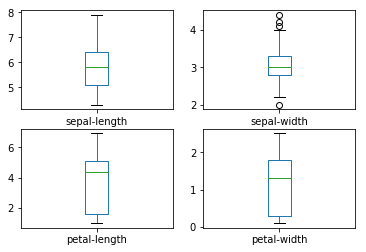

In [7]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

We can also create a histogram of each input variable to get an idea of the distribution.

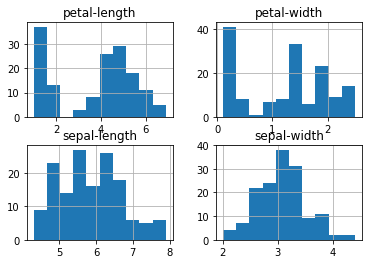

In [8]:
dataset.hist()
plt.show()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.
## 3.2 Multivariate Plots
Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

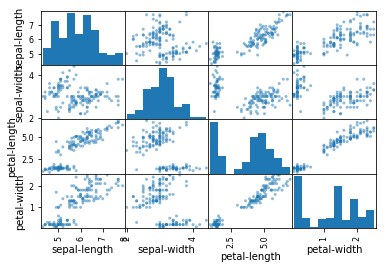

In [9]:
scatter_matrix(dataset)
plt.show()

## 4 - Evaluating ML Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

Separate out a validation dataset.<br>
Set-up the test harness to use 10-fold cross validation.<br>
Build 5 different models to predict species from flower measurements<br>
Select the best model.
## 4.1 - Create a Validation Dataset
We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [10]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

We now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

## 4.2 - Test Harness
We will use 10-fold cross validation to estimate accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

In [11]:
seed = 7
scoring = 'accuracy'

We are using the metric of ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## 5 - Build Models
We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 6 different algorithms:

Logistic Regression <b>(LR)</b><br>
Linear Discriminant Analysis <b>(LDA)</b><br>
K-Nearest Neighbors <b>(KNN)</b><br>
Classification and Regression Trees <b>(CART)</b><br>
Gaussian Naive Bayes <b>(NB)</b><br>
Support Vector Machines <b>(SVM)</b>

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms. We reset the random number seed before each run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

## 5.1 - Logistic Regression

In [12]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_result = model_selection.cross_val_score(LogisticRegression(), X_train, Y_train, cv=kfold, scoring=scoring)

print('Logistic Regression : %f (%f)' % (cv_result.mean(), cv_result.std()))

Logistic Regression : 0.966667 (0.040825)


## 5.2 - Show with Graph

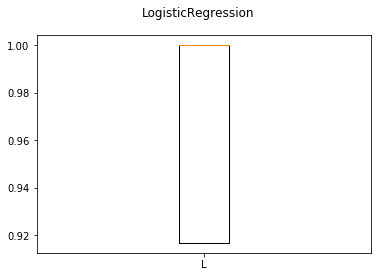

In [13]:
fig = plt.figure()
fig.suptitle('LogisticRegression')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
ax.set_xticklabels('LR')
plt.show()

## 5.3 - Linear Discriminant Analysis

In [14]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_result = model_selection.cross_val_score(LinearDiscriminantAnalysis(), X_train, Y_train, cv=kfold, scoring=scoring)

print('Linear Discriminant Analysis : %f (%f)' % (cv_result.mean(), cv_result.std()))

Linear Discriminant Analysis : 0.975000 (0.038188)


## 5.4 - Show with Graph

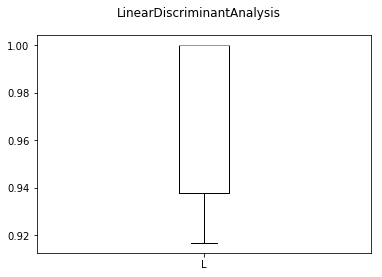

In [15]:
fig = plt.figure()
fig.suptitle('LinearDiscriminantAnalysis')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
ax.set_xticklabels('LDA')
plt.show()

## 5.5 - K-Nearest Neighbors

In [16]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_result = model_selection.cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=kfold, scoring=scoring)

print('KNeighborsClassifier : %f (%f)' % (cv_result.mean(), cv_result.std()))

KNeighborsClassifier : 0.983333 (0.033333)


## 5.5 - Show with Graph
We can also create a plot of the model evaluation result. There is a population of accuracy measure for algorithm because algorithm was evaluated 10 times (10 fold cross validation).

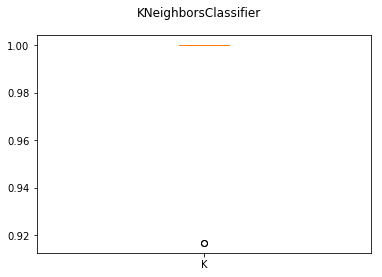

In [17]:
fig = plt.figure()
fig.suptitle('KNeighborsClassifier')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
ax.set_xticklabels('KNC')
plt.show()

## 5.6 - Classification and Regression Trees

In [18]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_result = model_selection.cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=kfold, scoring=scoring)

print('DecisionTreeClassifier : %f (%f)' % (cv_result.mean(), cv_result.std()))

DecisionTreeClassifier : 0.975000 (0.038188)


## 5.6 - Show with Graph

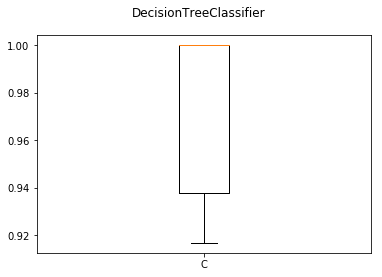

In [19]:
fig = plt.figure()
fig.suptitle('DecisionTreeClassifier')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
ax.set_xticklabels('CART')
plt.show()

## 5.7 - Gaussian Naive Bayes

In [20]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_result = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring=scoring)

print('GaussianNB : %f (%f)' % (cv_result.mean(), cv_result.std()))

GaussianNB : 0.975000 (0.053359)


## 5.7 - Show with Graph

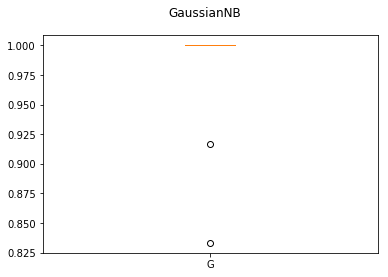

In [21]:
fig = plt.figure()
fig.suptitle('GaussianNB')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
ax.set_xticklabels('GNB')
plt.show()

## 5.8 - Support Vector Machines

In [22]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_result = model_selection.cross_val_score(SVC(), X_train, Y_train, cv=kfold, scoring=scoring)

print('SVC : %f (%f)' % (cv_result.mean(), cv_result.std()))

SVC : 0.991667 (0.025000)


## 5.8 - Show with Graph

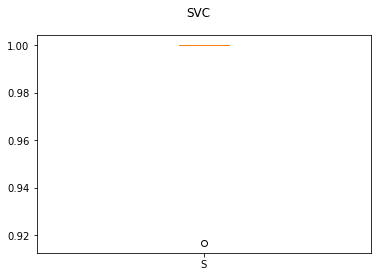

In [23]:
fig = plt.figure()
fig.suptitle('SVC')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
ax.set_xticklabels('SVC')
plt.show()

## 6 - Comparing the Algorithms
We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.
We can see that it looks like KNN has the largest estimated accuracy score.

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

In [24]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)

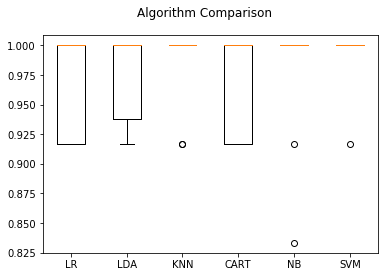

In [25]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.    

## 7 - Making Predictions
The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).